In [66]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
from math import ceil

In [211]:
get_wd = "C:/Users/Dell/Desktop/Ashoka/SEMESTER5/Introduction to Machine Learning/Assignments/HW3_Eigenfaces/"
train_dir = "Dataset/train_set/"
test_dir = "Dataset/test_set/"
test = "Dataset/test/"
# height and width of the image
height = 195  
width = 231


In [215]:
def image_matrix(dataset_dir):
	'''
	Input: Image Dataset (relative path )

	Function: for each image in the image dataset, creates a vector of the image and stores it in a matrix.
	Note: For training and testing the images must be in different directories

	Output: Subplots images( if the number of images are odd ignore the out of bounds exception)
	Returns: image matrix 
	'''
	# lists out all the images in the dataset_dir we iterate through this list
	images = os.listdir(get_wd + dataset_dir)


	#creating a training matrix all set to zero of size m*n by number of training images
	matrix = np.ndarray(shape=(height*width,len(images)), dtype = np.float64)
	figure, ax = plt.subplots(nrows=2,ncols=int(len(images)/2), figsize = (12,6))
	
	for i, img in enumerate(images):
		image = plt.imread(get_wd + dataset_dir + img)
		#creating a column matrix of image and storing as a column entry in the training matrix
		matrix[:,i:] = image.reshape(-1,1)  
		ax.ravel()[i].imshow(image, cmap='gray')
		ax.ravel()[i].set_axis_off()
		plt.tight_layout()
	plt.show()

	return matrix


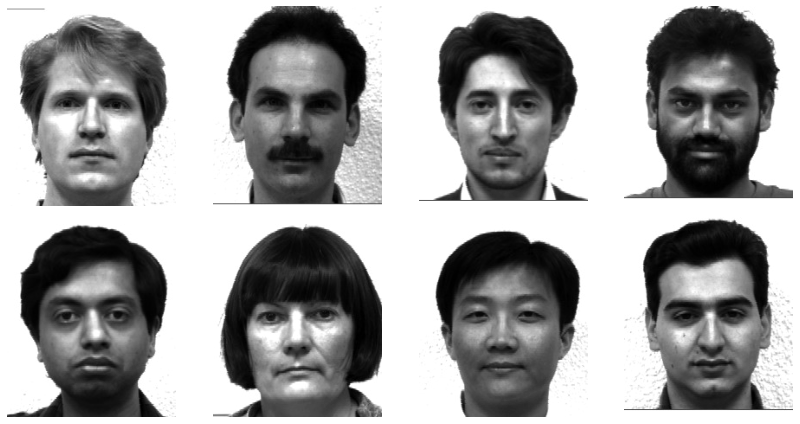

In [170]:
training_matrix = image_matrix(train_dir)

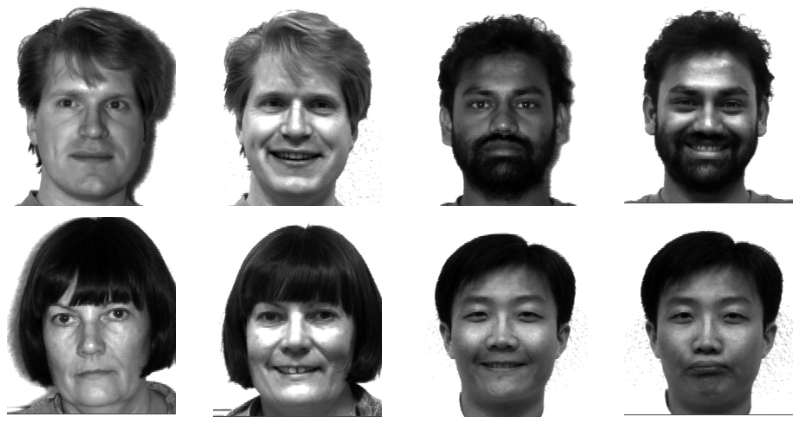

In [174]:
testing_matrix = image_matrix(test_dir)

## Mean face
For every image, we create a column vector  $I_i$ where $1\leq i \leq m$ such that,
$I_i = \begin{aligned}\begin{bmatrix}
           i_{1} \\
           i_{2} \\
           \vdots \\
           i_{n \times n}
         \end{bmatrix}
         \end{aligned}$
For each image vector we create a matrix of images $A$ where, 
$$A = [I_1, I_2,..., I_m]$$

Computing the mean vector for each $I_i$ in A
$$\mu = \frac{1}{m} \sum_{i - 1}^{m}A_i$$
$$mean\_matrix / normalized\_faces = A_i - \mu$$

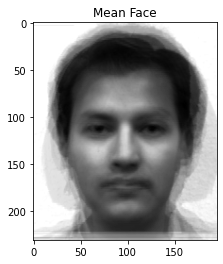

In [184]:
mean = np.zeros((1,height*width))
n = np.shape(training_matrix)[1]
for i in range(n):
	mean = np.add(mean, training_matrix[:,i])

#dividing by n
for i,data in enumerate(mean[0]):
	mean[0][i]= float(data/n)

plt.imshow(mean[0].reshape(width, height), cmap='gray')
plt.title("Mean Face")
plt.show()

In [208]:
## A - mu
def normalization(matrix):
	'''
	Input: training or testing matrix

	Function: subtracts the mean form the input matrix

	Output: Subplots normalized faces( if the number of images are odd ignore the out of bounds exception)
	Returns: normalization_matrix 
	'''
	figure, ax = plt.subplots(nrows=2,ncols=int(np.shape(matrix)[1]/2), figsize = (12,6))
	normalization_matrix = np.ndarray(shape=(height*width, np.shape(matrix)[1]))
	for i in range(np.shape(matrix)[1]):
		normalization_matrix[:,i] = np.subtract(matrix[:,i],mean)
		normal_img = normalization_matrix[:,i].reshape(width,height)
		ax.ravel()[i].imshow(normal_img, cmap='gray')
		ax.ravel()[i].set_axis_off()
		plt.tight_layout()
		plt.suptitle("Normalized Faces", size = 15)
	plt.show()
	return normalization_matrix

	

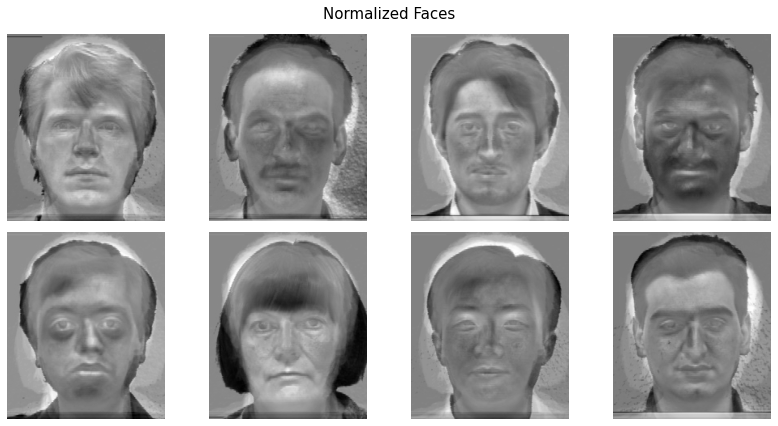

In [209]:
normalized_training_matrix = normalization(training_matrix)

## Computing covariance matrix $AA^T$
$A$ is $n^2 \times m$ matrix
$A^T$ is $m \times n^2$ matrix

$AA^T$ is a $n^2 \times n^2$ matrix so computing $AA^T$ is inefficient.  
Thus, we compute $A^TA$ matrix of size $m \times m$.

In [226]:
cov_matrix = np.cov(normalized_training_matrix.transpose())
print(cov_matrix.shape)
import plotly.express as px
fig = px.imshow(cov_matrix,labels = dict(color = "Viridis"))
fig.show()

(8, 8)


## Computing the eigenvectors and eigen values 
$A^TA v_i = c_i v_i$ where $c_i$ is the eigenvalue correspoinding to the eigenvector $v_i$